In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
col_ref = ('r', 'b', 'g', 'y', 'w')

def get_synthetic_data(num=10, low=0, high=1):
  return (high - low) * np.random.random_sample((num, 2)) + low
plt.style.use('default')
plt.style.use('seaborn-talk')

def init_plot(x_range=None, y_range=None, x_label="$x_1$", y_label="$x_2$"):
  temp,ax = plt.subplots(dpi = 100)
  ax.grid(c='0.70', linestyle=':')
  ax.set_xlim(x_range) 
  ax.set_ylim(y_range)
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)
  return ax

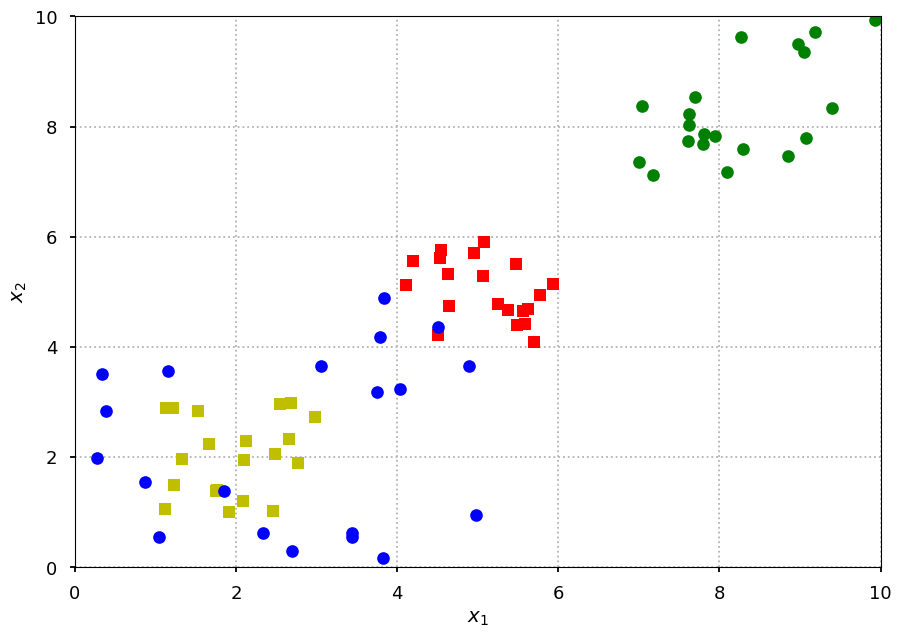

In [24]:
X1 = get_synthetic_data(20, 7, 10)
X2 = get_synthetic_data(20, 4, 6)
X3 = get_synthetic_data(20, 1, 3)
X4 = get_synthetic_data(20, 0, 5)

plot = init_plot([0, 10], [0, 10])  

plot.plot(*X1.T, 'go', *X2.T, 'rs', *X3.T, 'ys', *X4.T, 'bo');


In [25]:
class kNearestNeighbors():
  def __init__(self, k, distance):
    if distance == 1:
      self.distance = np.abs    
    elif distance == 2:
      self.distance = np.square  
    self.k = k
  def train(self, x, y):
    self.x_train = x
    self.y_train = y

  def predict(self, x):
    predictions = []  
    nof_classes = np.amax(self.y_train) + 1
    for x_test in x:
      distances = np.sum(self.distance(self.x_train - x_test), axis=1)
      votes = np.zeros(nof_classes, dtype=np.int)
      for neighbor_id in np.argsort(distances)[:self.k]:
        neighbor_label = self.y_train[neighbor_id]
        votes[neighbor_label] += 1
      predictions.append(np.argmax(votes))
    return predictions

In [30]:
class kAnalysis():
  def __init__(self, *x, k=1, dist):
    self.nof_classes = len(x)
    y = [i * np.ones(_x.shape[0], dtype=np.int) for i, _x in enumerate(x)]
    y = np.array(y).ravel()
    self.x_train = x
    x = np.concatenate(x, axis=0)
    self.nn = kNearestNeighbors(k, dist)
    self.nn.train(x, y)
    self.dist = dist
  
  def prepare_test_samples(self, low=0, high=10, step=0.03):
    self.range = [low, high]
    grid = np.mgrid[low:high+step:step, low:high+step:step]
    self.x_test = np.vstack([grid[0].ravel(), grid[1].ravel()]).T


  def analyse(self):
    self.y_test = self.nn.predict(self.x_test)
    self.classified = list()
    for label in range(self.nof_classes):
      class_i = np.array([self.x_test[i] \
                           for i, l in enumerate(self.y_test) \
                          if l == label])
      self.classified.append(class_i)


  def plot(self, t=''):
    plot = init_plot(self.range, self.range)
    plot.set_title(t)
    plot.grid(False)
    for i, x in enumerate(self.x_train):
      plot.plot(*x.T, col_ref[i] + 'o')
    for i, x in enumerate(self.classified):
      plot.plot(*x.T, col_ref[i] + ',')


Enter 1 for L1 and 2 for L2:  2
Enter the value of K: 4


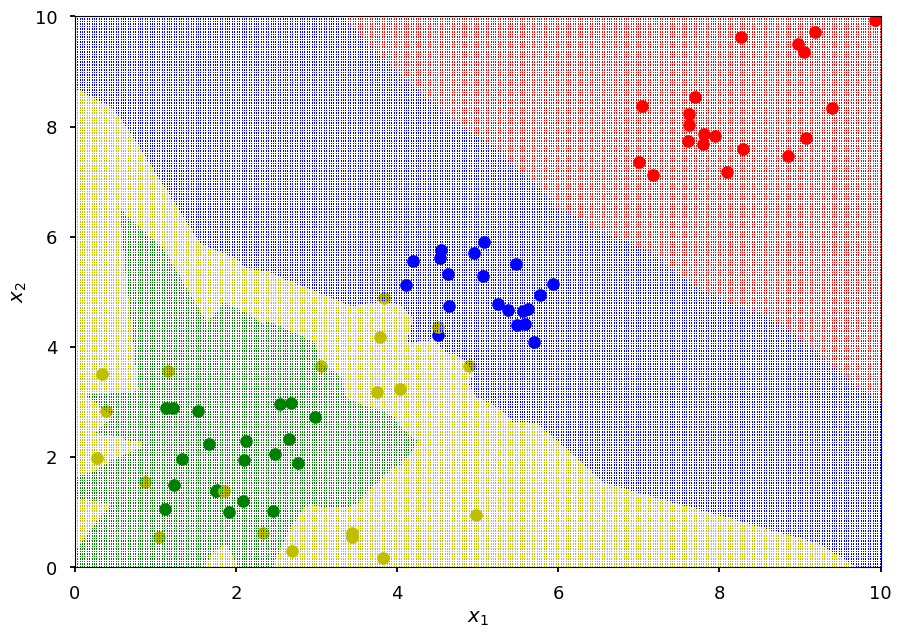

In [31]:
metric = int(input("Enter 1 for L1 and 2 for L2:  "))
k = int(input("Enter the value of K: "))
knn = kAnalysis(X1, X2, X3, X4, k=k, dist = metric)
knn.prepare_test_samples()
knn.analyse()
knn.plot()